<ipython-input-1-7c413a36599e>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  nom = torch.lgamma(torch.tensor((nu+d)/2))
<ipython-input-1-7c413a36599e>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  denom = torch.lgamma(torch.tensor(nu/2)) + d/2 * (np.log(nu) + np.log(np.pi))


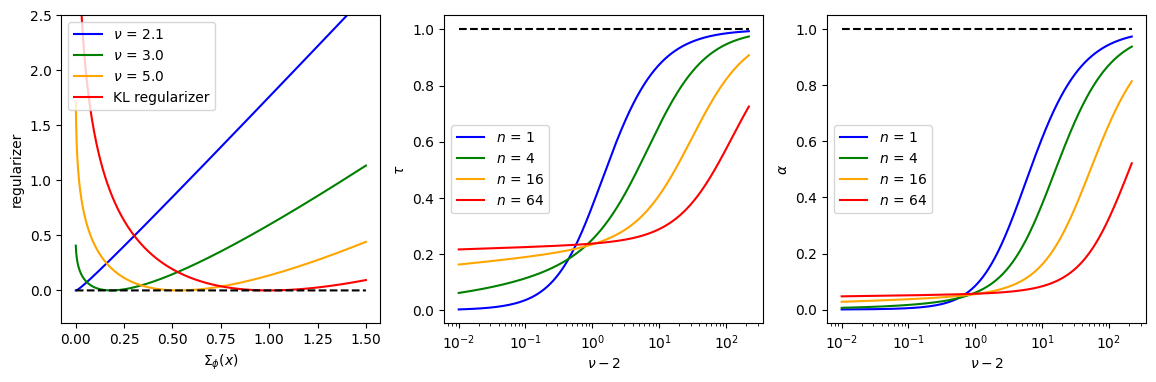

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np

n_dim = m_dim = 1

def gamma(nu, n_dim, m_dim):
    return - 2/(nu+m_dim+n_dim)

def log_t_normalizing_const(nu, d):
    nom = torch.lgamma(torch.tensor((nu+d)/2))
    denom = torch.lgamma(torch.tensor(nu/2)) + d/2 * (np.log(nu) + np.log(np.pi))
    return nom - denom

def tau_base(nu, n_dim, sigma) :
    log_tau_base = -n_dim * np.log(sigma) + log_t_normalizing_const(nu,n_dim) - np.log(nu + n_dim - 2) + np.log(nu-2)
    return torch.exp(log_tau_base/ (nu+n_dim-2))

def tau_generate(nu, n_dim, sigma) :
    return tau_base(nu, n_dim, sigma) / torch.sqrt(1 + n_dim/nu)

def gamma_regularizer(nu, n_dim, m_dim, recon_sigma, Sigma) :
    # Sigma = Capital Sigma_phi = sigma_phi^2.
    if nu == 0 :
        return Sigma - torch.log(Sigma) - 1
    tau = tau_base(nu, n_dim, recon_sigma).pow(2)

    log_tau_base = -n_dim * np.log(recon_sigma) + log_t_normalizing_const(nu,n_dim) - np.log(nu + n_dim - 2) + np.log(nu-2)
    C_1bar_2 = (1 + m_dim / (nu + n_dim - 2)) * torch.exp(-gamma(nu, n_dim, m_dim) / (1+gamma(nu, n_dim, m_dim)) * log_tau_base)

    return nu / (nu+n_dim-2) * Sigma + tau * nu - nu * C_1bar_2 * Sigma.pow(-gamma(nu, n_dim, m_dim) / 2 / (1+gamma(nu, n_dim, m_dim)))

def coef(nu, n_dim, m_dim, recon_sigma):
    log_c2 = (np.log(1 + (n_dim+m_dim)/(nu-2)) + n_dim * np.log(recon_sigma) -
            log_t_normalizing_const(nu, n_dim+m_dim)) * (-gamma(nu, n_dim, m_dim) / (1+gamma(nu, n_dim, m_dim)))
    return -gamma(nu, n_dim, m_dim) * nu / (2 * torch.exp(log_c2))

fig = plt.figure(figsize = (14,4))
# Sigma vs gamma-regularizer plot
color_list = ['blue', 'green', 'orange', 'red']

ax = fig.add_subplot(1,3,1)
nu_list = [2.1, 3.0, 5.0]
Sigma = torch.tensor(np.arange(1,1500) * 0.001)
recon_sigma = 1

n_dim1 = 1
m_dim1 = 1

for ind in range(len(nu_list)) :
    nu = nu_list[ind]
    value = gamma_regularizer(nu, n_dim1, m_dim1, recon_sigma, Sigma)
    plt.plot(Sigma, value, label = rf'$\nu$ = {nu}', color = color_list[ind])

nu = 0
value = gamma_regularizer(nu, n_dim1, m_dim1, recon_sigma, Sigma)
plt.plot(Sigma, value, label = f'KL regularizer', color = 'red')
plt.plot(Sigma, torch.zeros_like(Sigma), '--', color = 'black')

plt.ylim(-0.3 ,2.5)
# plt.xlabel(r'$\sigma_\phi = \sqrt{\Sigma_\phi}$')
plt.xlabel(r'$\Sigma_\phi(x)$')
plt.ylabel(r'regularizer')
plt.legend()

#################

ax = fig.add_subplot(1,3,2)
#nu = torch.tensor(np.arange(201,5000) * 0.01)
nu = torch.exp(torch.tensor(np.arange(-460,540) * 0.01)) + 2
#gamma = -2 / (nu + n_dim + m_dim)
#recon_sigma_list = [1.0, 2.0, 5.0, 10.0]

recon_sigma = 1
data_dim_list = [1, 4, 16, 64]

for ind in range(4) :
    #recon_sigma = recon_sigma_list[ind]
    data_dim = data_dim_list[ind]
    tau = tau_generate(nu, data_dim, recon_sigma)
    plt.plot(nu-2, tau, color=color_list[ind], label = rf'$n$ = {data_dim}')
plt.xscale('log')
plt.plot(nu-2, torch.ones_like(nu), '--', color = 'black')
#plt.xlim(0.01, 50)
plt.xlabel(r'$\nu-2$')
plt.ylabel(r'$\tau$')
plt.legend(loc='center left')

##################

ax = fig.add_subplot(1,3,3)
m_dim = 1

for ind in range(4) :
    #recon_sigma = recon_sigma_list[ind]
    data_dim = data_dim_list[ind]
    coef_gen = coef(nu, data_dim, m_dim, recon_sigma)
    plt.plot(nu-2, coef_gen, color=color_list[ind], label = rf'$n$ = {data_dim}')
plt.xscale('log')
plt.plot(nu-2, torch.ones_like(nu), '--', color = 'black')
#plt.xlim(0.01, 50)
plt.xlabel(r'$\nu-2$')
plt.ylabel(r'$\alpha$')
plt.legend(loc='center left')

plt.savefig('regularizer_revised.png')
plt.show()



In [ ]:
nu = torch.exp(torch.tensor(np.arange(-46,54) * 0.1)) + 2
print(nu)

tensor([  2.0101,   2.0111,   2.0123,   2.0136,   2.0150,   2.0166,   2.0183,
          2.0202,   2.0224,   2.0247,   2.0273,   2.0302,   2.0334,   2.0369,
          2.0408,   2.0450,   2.0498,   2.0550,   2.0608,   2.0672,   2.0743,
          2.0821,   2.0907,   2.1003,   2.1108,   2.1225,   2.1353,   2.1496,
          2.1653,   2.1827,   2.2019,   2.2231,   2.2466,   2.2725,   2.3012,
          2.3329,   2.3679,   2.4066,   2.4493,   2.4966,   2.5488,   2.6065,
          2.6703,   2.7408,   2.8187,   2.9048,   3.0000,   3.1052,   3.2214,
          3.3499,   3.4918,   3.6487,   3.8221,   4.0138,   4.2255,   4.4596,
          4.7183,   5.0042,   5.3201,   5.6693,   6.0552,   6.4817,   6.9530,
          7.4739,   8.0496,   8.6859,   9.3891,  10.1662,  11.0250,  11.9742,
         13.0232,  14.1825,  15.4637,  16.8797,  18.4446,  20.1741,  22.0855,
         24.1980,  26.5325,  29.1126,  31.9641,  35.1155,  38.5982,  42.4473,
         46.7012,  51.4024,  56.5982,  62.3403,  68.6863,  75.69